<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

ResNet50 = ResNet50(weights='imagenet')
features = model.predict(x)

```

Next you will need to remove the last layer from the ResNet model. Here, we loop over the layers to use the sequential API. There are easier ways to add and remove layers using the Keras functional API, but doing so introduces other complexities. 

```python
# Remote the Last Layer of ResNEt
ResNet50._layers.pop(0)

# Out New Model
model = Sequential()

# Add Pre-trained layers of Old Model to New Model
for layer in ResNet50.layers:
    model.add(layer)

# Turn off additional training of ResNet Layers for speed of assignment
for layer in model.layers:
    layer.trainable = False

# Add New Output Layer to Model
model.add(Dense(1, activation='sigmoid'))
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

In [1]:
from skimage.io import imread_collection
from skimage.transform import resize
import numpy as np

from sklearn.model_selection import train_test_split

# paths
forests = 'data/forest/*.jpg'
mountains = 'data/mountain/*.jpg'

# creating a collection with the available images
forests = imread_collection(forests).concatenate()
mountains = imread_collection(mountains).concatenate()

forests.shape, mountains.shape

((328, 256, 256, 3), (374, 256, 256, 3))

In [2]:
y_0 = np.zeros(forests.shape[0])
y_1 = np.ones(mountains.shape[0])

y_0.shape, y_1.shape
X = np.concatenate([forests, mountains])
y = np.concatenate([y_0, y_1])

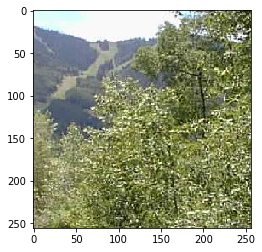

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X[100]);

In [5]:
### YOUR CODE HERE
# Loading a pretrained network from Keras, ResNet50 - a 50 layer deep network trained to recognize 1000 objects. 

''' Imports '''
import numpy as np 

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model # This is the functional API

In [6]:
res = ResNet50(input_shape=(256, 256, 3), weights='imagenet', include_top=False)

# Remove the last layer of ResNE

# make all resnet layers untrainable
for layer in res.layers:
    layer.trainable = False
    
# add your head on top
x = res.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(res.input, predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

//anaconda3/envs/U4-S2-NN/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 6s 0us/step


W1112 18:46:51.833898 4620342720 deprecation.py:506] From //anaconda3/envs/U4-S2-NN/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1112 18:46:51.975594 4620342720 deprecation.py:323] From //anaconda3/envs/U4-S2-NN/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# Fit Model
model.fit(X, y, epochs=10, validation_split=0.10)

Train on 631 samples, validate on 71 samples
Epoch 1/10
631/631 [==============================] - 160s 253ms/sample - loss: 0.4093 - acc: 0.8494 - val_loss: 0.7637 - val_acc: 0.7746
Epoch 2/10
631/631 [==============================] - 141s 224ms/sample - loss: 0.0617 - acc: 0.9762 - val_loss: 0.5728 - val_acc: 0.8028
Epoch 3/10
631/631 [==============================] - 158s 251ms/sample - loss: 0.0280 - acc: 0.9842 - val_loss: 0.2307 - val_acc: 0.9014
Epoch 4/10
631/631 [==============================] - 149s 237ms/sample - loss: 0.0161 - acc: 0.9937 - val_loss: 0.4437 - val_acc: 0.8451
Epoch 5/10
631/631 [==============================] - 153s 243ms/sample - loss: 0.0221 - acc: 0.9937 - val_loss: 0.5788 - val_acc: 0.8169
Epoch 6/10
631/631 [==============================] - 154s 244ms/sample - loss: 0.0065 - acc: 0.9984 - val_loss: 0.1504 - val_acc: 0.9296
Epoch 7/10
631/631 [==============================] - 160s 254ms/sample - loss: 0.0178 - acc: 0.9921 - val_loss: 0.0309 - val_a

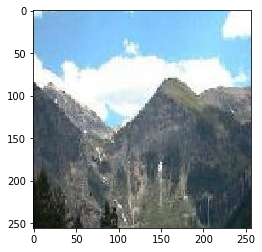

In [8]:
plt.imshow(X[400]);

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language